<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Timothy-Kam-and-Junsang-Lee" data-toc-modified-id="Timothy-Kam-and-Junsang-Lee-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Timothy Kam and Junsang Lee</a></span></li></ul></li><li><span><a href="#Concatenate-data-from-FRED-and-Lucas-Nicolini-(2015)" data-toc-modified-id="Concatenate-data-from-FRED-and-Lucas-Nicolini-(2015)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Concatenate data from FRED and Lucas-Nicolini (2015)</a></span></li><li><span><a href="#Fitting-relation-between-M1S/GDP-and-3-month-T-bill-rate" data-toc-modified-id="Fitting-relation-between-M1S/GDP-and-3-month-T-bill-rate-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fitting relation between M1S/GDP and 3-month T-bill rate</a></span></li></ul></div>

# Data (Quarterly) from Lucas and Nicolini

### Timothy Kam and Junsang Lee

GitHub project site: https://github.com/phantomachine/csim

In [1]:
import requests, zipfile, io
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import os
from fredapi import Fred

%matplotlib inline

# Quarterly Data


Next, we get our data series, obtained from Minneapolis Fed Working Paper 718, *On the Stability of Money Demand*, by Robert E Lucas, Jr. and Juan Pablo Nicolini, at:

https://www.minneapolisfed.org/research/working-papers/on-the-stability-of-money-demand

**Note**: this paper was published in the [*Journal of Monetary Economics* (Vol. 73, July 2015, pp. 48-65)](http://dx.doi.org/10.1016/j.jmoneco.2015.03.005) 

In [2]:
# URL to data in ZIP format
url = "http://minneapolisfed.contentdm.oclc.org/utils/getdownloaditem/collection/p16030coll7/id/91/filename/92.zip"
zipf = requests.get(url)
file = zipfile.ZipFile(io.BytesIO(zipf.content))
file.extractall()

In [3]:
# View directory
!ls -la

total 2280
drwxr-xr-x 5 obiwan obiwan   4096 Jul 19 11:42  .
drwxrwxr-x 5 obiwan obiwan   4096 Jul 27  2017  ..
drwxr-xr-x 4 obiwan obiwan   4096 Jul 18 09:03  AdditionalFiles
-rw-rw-r-- 1 obiwan obiwan 398804 Jul 19 11:06  data_notes-lucas-nicolini-annual.html
-rw-r--r-- 1 obiwan obiwan 132817 Jul 19 11:07  data_notes-lucas-nicolini-annual.ipynb
-rw-rw-r-- 1 obiwan obiwan 382751 Jul 19 11:07  data_notes-lucas-nicolini.html
-rw-r--r-- 1 obiwan obiwan 114193 Jul 19 11:42  data_notes-lucas-nicolini-quarterly.ipynb
drwxr-xr-x 2 obiwan obiwan   4096 Jul 19 11:38  .ipynb_checkpoints
-rw-r--r-- 1 obiwan obiwan     78 Jul 19 11:40  .~lock.MoneyData_Lucas-Nicolini-Wang-Wright-Liu-version.xlsx#
-rw------- 1 obiwan obiwan 607291 Jul 17 09:10 'Long-run money demand redux _ VOX, CEPR Policy Portal.pdf'
-rw-rw-r-- 1 obiwan obiwan 590222 Jul 17 09:33  Lucas-Nicolini-Money-Demand-JME2015.pdf
-rw-rw-r-- 1 obiwan obiwan  17370 Jul 19 11:39  MoneyData_Lucas-Nicolini-Wang-Wright-Liu-version.xlsx
drwxr-xr

In [4]:
# Probe inside AdditionalFiles (from Lucas and Nicolini)
f = os.listdir("AdditionalFiles/data/")
print(f)

['.~lock.data_consolidated.xlsx#', 'AppendixMMDA.pdf', 'Quarterly_mmda.xlsx', 'data_consolidated.xlsx']


In [5]:
# Note: 
# (1) The ! command below, escapes you from the current Python interface to the server Terminal prompt
# (2) pip install will install a new python package/library that may not be pre-existing already
# !pip install fredapi # uncomment and run if FRED API not installed yet

# Instantiate Fred class as "fred", use your own api_key!
fred = Fred(api_key='8f21f53dd9e218b356ed31f6aa39b26d')

In [6]:
# Create empty dictionary
df = {}

In [7]:
# Import Lucas-Nicolini (2015, JME) dataset (Quarterly version)
data_lucas_nicolini = pd.read_excel('AdditionalFiles/data/Quarterly_mmda.xlsx', 'data')
data_lucas_nicolini

,year,quarter,date,gdp,savings,mmda,savings - mmda,savings - mmda (interpolated in 1982Q4-1984Q2),mmda series (interpolated in 1982Q4-1984Q2)
0,1980,1,1980.00,2796.5,400.1,NaN,400.100000,400.100000,0.000000
1,1980,2,1980.25,2799.9,390.8,NaN,390.800000,390.800000,0.000000
2,1980,3,1980.50,2860.0,419.0,NaN,419.000000,419.000000,0.000000
3,1980,4,1980.75,2993.5,400.3,NaN,400.300000,400.300000,0.000000
4,1981,1,1981.00,3131.8,372.0,NaN,372.000000,372.000000,0.000000
5,1981,2,1981.25,3167.3,360.9,NaN,360.900000,360.900000,0.000000
6,1981,3,1981.50,3261.2,348.1,NaN,348.100000,348.100000,0.000000
7,1981,4,1981.75,3283.5,343.9,NaN,343.900000,343.900000,0.000000
8,1982,1,1982.00,3273.8,344.2,NaN,344.200000,344.200000,0.000000
9,1982,2,1982.25,3331.3,343.5,NaN,343.500000,343.500000,0.000000


## Concatenate data from FRED and Lucas-Nicolini (2015)

In [8]:
# Set window of data
date_start = '1980-01-01' # Start date in Lucas-Nicolini dataset
date_stop = '2017-01-01'  # Stop date in Lucas-Nicolini dataset

# Truncate data window
date_truncate_start = '1984-01-01'
date_truncate_stop = '2007-10-01'

In [9]:
# Add data and KEY to dictionary
df['3-mth Tbill Rate (Q)'] = fred.get_series('TB3MS', 
                                             frequency='q', 
                                             observation_start=date_start, 
                                             observation_end=date_stop
                                        )

In [13]:
# Data on Sweep adjusted M1 and nominal GDP
# M1S = data_lucas_nicolini['savings - mmda'].tolist()
M1S = data_lucas_nicolini['savings - mmda (interpolated in 1982Q4-1984Q2)'].tolist()
GDP = data_lucas_nicolini['gdp'].tolist()
# Add data and KEY to dictionary
df['M1S'] = M1S
df['GDP'] = GDP
df['M1S/GDP'] = [ M1S[i]/GDP[i] for i in range(len(M1S)) ]

In [14]:
# Convert to Pandas dataframe
d = pd.DataFrame(df)

In [15]:
dcut = d.loc[date_truncate_start:date_truncate_stop]
dcut

,3-mth Tbill Rate (Q),GDP,M1S,M1S/GDP
1984-01-01,9.17,3912.8,419.431676,0.107195
1984-04-01,9.80,4015.0,431.570288,0.107489
1984-07-01,10.32,4087.4,443.708901,0.108555
1984-10-01,8.80,4147.6,434.088435,0.104660
1985-01-01,8.18,4237.0,450.919375,0.106424
1985-04-01,7.46,4302.3,460.087131,0.106940
1985-07-01,7.11,4394.6,478.707423,0.108931
1985-10-01,7.17,4453.1,480.151485,0.107824
1986-01-01,6.90,4516.3,450.888280,0.099836
1986-04-01,6.14,4555.2,475.601216,0.104408


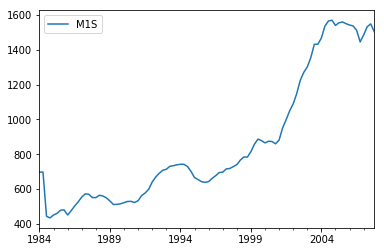

In [227]:
# Sweep adjusted M1 (M1S)
dcut.plot(y='M1S')

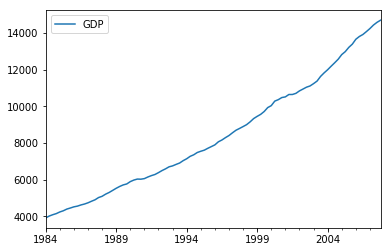

In [228]:
# Nominal GDP
dcut.plot(y='GDP')

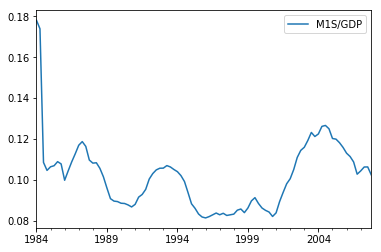

In [229]:
# M/PY using M1 (sweep adjusted) data for M, nominal GDP for PY
dcut.plot(y='M1S/GDP')

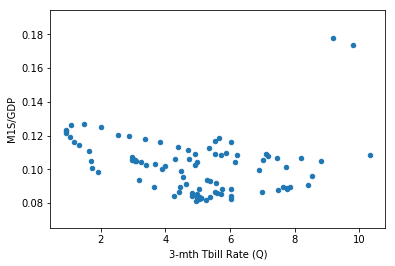

In [230]:
# Scatter plot M/PY vs. r
dcut.plot(x='3-mth Tbill Rate (Q)', y='M1S/GDP', kind='scatter')

In [231]:
# Full sample stats
d.mean()

3-mth Tbill Rate (Q)       4.417785
GDP                     9767.020270
M1S                     1190.662302
M1S/GDP                    0.116232
dtype: float64

## Fitting relation between M1S/GDP and 3-month T-bill rate

First, define a linear regression function

In [238]:
def ols(x, y):
    # Linear best fit:
    deg = 1 # OLS for linear best fit equation
    bols = np.polyfit(x, y, deg, rcond=None, full=False)
    y = bols[1] + bols[0]*x

    print("\nNow we approximate correlation: \n")
    print("\t\tLinear Best Fit (Slope, Intercept) = ", str(bols), "\n")
    
    return bols

We regress $\ln(M1J/GDP)$ on the 3-month Tbill Rate:

In [244]:
# Data
xdata = np.log(1.0 + 0.01*dcut['3-mth Tbill Rate (Q)'])
ydata = np.log(dcut['M1S/GDP'])

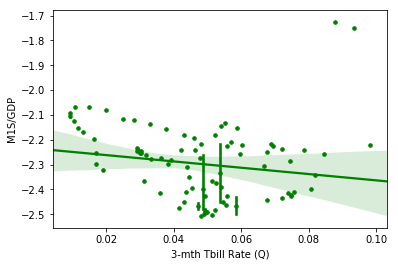

In [271]:
# Visualize scatterplot with linear best fit
import matplotlib.pyplot as plt
plt.figure()
ax2 = sn.regplot(x=xdata, y=ydata, 
                 data=None, 
                 fit_reg=True, 
                 x_estimator=np.mean, 
                 marker=".", color="g") 

# Implied regression model from crude calibration exercise (July 29th version)
# xmodel = np.linspace(0.0, 1.1*xdata.max(), 50)
# mean_inflation_data = 0.010252
# mean_ivelocity_model = 0.578553
# slope_model = -0.45000
# int_model = mean_ivelocity_model - slope_model*mean_inflation_data
# ymodel = int_model + slope_model*xmodel
# plt.plot(xmodel, ymodel, '-r')
# plt.show()

And here's the linear best fit

In [254]:
bols = ols(xdata, ydata)


Now we approximate correlation: 

		Linear Best Fit (Slope, Intercept) =  [-1.27374274 -2.2364484 ] 



In [266]:
# Mean M/PY at mean of 3-mth Tbill rate
MiPY_mean = bols[0]*xdata.mean() + bols[1] 
print("Elasticity of M/PY wrt 3-mth Tbill Rate = %0.5g (percent)" %(bols[0]))
print("Mean M/PY at mean of 3-mth Tbill rate = %0.5g (qtrs) := %0.5g (year)" %(np.exp(MiPY_mean), 4.*np.exp(MiPY_mean)))

Elasticity of M/PY wrt 3-mth Tbill Rate = -1.2737 (percent)
Mean M/PY at mean of 3-mth Tbill rate = 0.10055 (qtrs) := 0.40222 (year)
